<a href="https://colab.research.google.com/github/nimalan-parameshwaran/Cardiovascular-Disease-Risk-Predictor/blob/main/CDR_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Cardiovascular Disease Risk Predictor**

In [1]:
#Step 1: Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Step 2: Load the Dataset
df = pd.read_csv('CVD_FinalData.csv')  # Adjust the filename if needed
print("Initial Shape:", df.shape)
df.head()

Initial Shape: (5390, 23)


,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,...,BMI,heartRate,glucose,exng,caa,Triglyceride,hdl_cholestrol,ldl_cholestrol,CPK_MB_Percentage,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,...,NaN,90.0,80.0,1,1,212,32,173,5,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,...,29.77,72.0,75.0,0,0,112,35,124,4,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,...,20.35,88.0,94.0,0,0,135,60,126,5,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,...,28.26,68.0,94.0,1,2,232,28,200,7,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,...,26.42,70.0,77.0,0,0,143,38,111,5,0


In [3]:
# Step 3: Clean Data - Drop rows with missing values
df_clean = df.dropna()
print("Shape after dropping missing values:", df_clean.shape)

Shape after dropping missing values: (4662, 23)


In [4]:
# Step 4: Define Features and Target
X = df_clean.drop(columns=['TenYearCHD'])
y = df_clean['TenYearCHD']

# One-hot encode categorical variables
X = pd.get_dummies(X, drop_first=True)

# Normalize numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)


In [5]:
# ⚙️ Step 5: Train XGBoost Classifier
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:20:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

Confusion Matrix:
 [[497   0]
 [  0 436]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       497
           1       1.00      1.00      1.00       436

    accuracy                           1.00       933
   macro avg       1.00      1.00      1.00       933
weighted avg       1.00      1.00      1.00       933



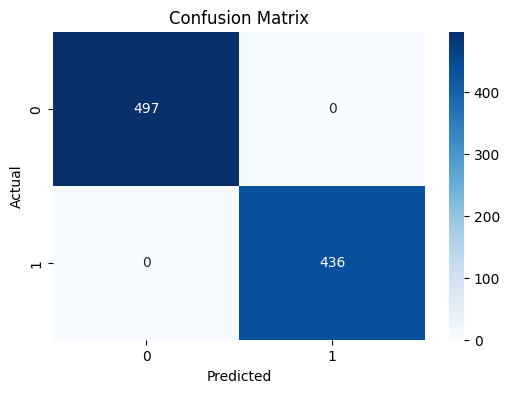

In [6]:
# Step 6: Predictions & Evaluation
y_pred = model.predict(X_test)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Classification Report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

# Visualize Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [7]:
import joblib
joblib.dump(model, 'xgb_model.joblib')
joblib.dump(scaler, 'scaler.joblib')
joblib.dump(list(X.columns), 'feature_names.joblib')


['feature_names.joblib']